#Load Libraries

In [4]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator
import random
import os

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Activation
from keras import optimizers
from keras_preprocessing.image import ImageDataGenerator
from keras.models import load_model
#ignoring warnings
import warnings 
warnings.filterwarnings("ignore")


#Load Dataset

Dhruvil Dave - Dataset Owner from Kaggle


In [5]:
from google.colab import drive
drive.mount ('/content/drive')


Mounted at /content/drive


In [6]:
path = '/content/drive/My Drive/AI-FINAL-PROJECT'
letters_labels = pd.read_csv(f'{path}/english.csv')

#Visualize Data

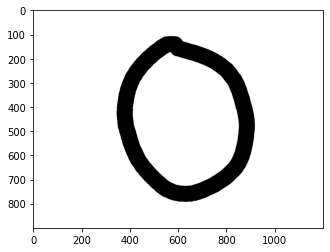

In [7]:
img1 = cv.imread(f"{path}/Img/img001-009.png", cv.IMREAD_COLOR)
plt.imshow(img1)

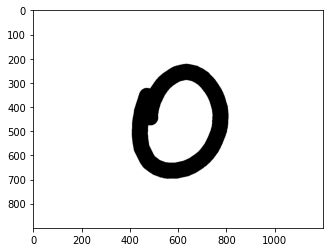

In [8]:
img2 = cv.imread(f"{path}/Img/img001-055.png", cv.IMREAD_COLOR)
plt.imshow(img2)

In [9]:
letters_labels.head()

,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0


In [10]:
letters_labels.describe() # returns description of the data in the DataFrame

,image,label
count,3410,3410
unique,3410,62
top,Img/img001-001.png,0
freq,1,55


The unique labels we have are 62. Which are 26 alphabet letters (small letters and capital letters) and the 10 numbers.

In [11]:
letters_labels.info() # prints information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410 entries, 0 to 3409
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   3410 non-null   object
 1   label   3410 non-null   object
dtypes: object(2)
memory usage: 53.4+ KB


In [12]:
(letters_labels['label'] == 'z').sum() #number of 'z's in the dataset

55

In [13]:
(letters_labels['label'] == 'a').sum() #number of 'a's in the dataset

55

In [14]:
(letters_labels['label'] == '1').sum() #number of '1's in the dataset

55

In [15]:
(letters_labels['label'] == 'b').sum() + (letters_labels['label'] == 'B').sum() #number of 'b's and 'B's in the dataset

110

In [16]:
Chars = letters_labels['label'].unique()
print(f'Characters Available:\n {Chars} ')

Characters Available:
 ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H'
 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z'
 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r'
 's' 't' 'u' 'v' 'w' 'x' 'y' 'z'] 


# Data Cleaning

The dataset had no null values or imbalances therefore we found no need to do cleaning again.

The labels were categorical hence there was nothing to change

#Split Dataset into Test and Train

In [17]:
#Getting a random sample in each character batch
rand = list()
prev_count = 0
for count in range(55, len(letters_labels) + 1, 55):
  rand.extend(random.sample(range(prev_count, count), 10))
  prev_count = count

val_set = pd.DataFrame(letters_labels.iloc[rand, :].values, columns=['image', 'label'])



test_rand = random.sample(range(len(val_set)), 50)

test_set = pd.DataFrame(letters_labels.iloc[test_rand, :].values, columns=['image', 'label'])

test_set.to_csv(f'{path}/test.csv', header=False, index=False)

letters_labels.drop(rand, inplace=True)



In [18]:
# ImageDataGenerator - For image preprocessing
data_generator = ImageDataGenerator(
        rescale=1.0/255.0, #Normalizing
        rotation_range=10, # rotation
        zoom_range=0.2, # zoom
        brightness_range=[0.2,1.2]) # brightness

###Validation Data

In [19]:

validation_data_frame = data_generator.flow_from_dataframe(dataframe=val_set, directory=path, x_col='image', y_col='label', target_size=(64, 64), class_mode='categorical')
validation_data_frame

Found 620 validated image filenames belonging to 62 classes.


###Train Data

In [20]:
training_data_frame = data_generator.flow_from_dataframe(dataframe=letters_labels, directory=path, x_col='image', y_col='label', target_size=(64, 64), class_mode='categorical')
training_data_frame

Found 2790 validated image filenames belonging to 62 classes.


###Test Data

In [21]:
test_data_frame = data_generator.flow_from_dataframe(dataframe=test_set, directory=path, x_col='image', y_col='label', 
                                                     target_size=(64, 64), class_mode='categorical', shuffle=False)
test_data_frame

Found 50 validated image filenames belonging to 12 classes.


#Train Model

###Build Model

In [22]:
model = Sequential()

# Convolutional Layer - reduce image dimension while mantaining it's quality
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(64,64,3)))
# Rectified Linear Unit - It is fast and works well with convolutional letters
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layer - dropping randomly selected neurons during training
model.add(Dropout(0.25))

# Convolutional Layer - reduce image dimension while mantaining it's quality
model.add(Conv2D(32, (3, 3),input_shape=(64,64,3)))
# Rectified Linear Unit - It is fast and works well with convolutional letters
model.add(Activation('relu'))

model.add(Flatten())
# Dense layer  - Where neurons receives  neurons from previous layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output Dense Layer
model.add(Dense(62, activation='softmax'))

# Compile the model
model.compile(optimizers.RMSprop(lr=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

###Fit Model

In [23]:
epochs = 100
history = model.fit_generator(training_data_frame, 
                    epochs=epochs,  # one forward/backward pass of training data
                    validation_data=validation_data_frame) 

Epoch 1/100
88/88 [==============================] - 1336s 15s/step - loss: 4.1888 - accuracy: 0.0168 - val_loss: 4.1223 - val_accuracy: 0.0194
Epoch 2/100
88/88 [==============================] - 74s 839ms/step - loss: 4.1261 - accuracy: 0.0190 - val_loss: 4.1161 - val_accuracy: 0.0823
Epoch 3/100
88/88 [==============================] - 76s 858ms/step - loss: 4.1033 - accuracy: 0.0290 - val_loss: 4.0843 - val_accuracy: 0.1306
Epoch 4/100
88/88 [==============================] - 76s 861ms/step - loss: 4.0414 - accuracy: 0.0502 - val_loss: 3.9779 - val_accuracy: 0.1581
Epoch 5/100
88/88 [==============================] - 74s 842ms/step - loss: 3.8808 - accuracy: 0.0910 - val_loss: 3.7428 - val_accuracy: 0.1887
Epoch 6/100
88/88 [==============================] - 75s 850ms/step - loss: 3.6442 - accuracy: 0.1362 - val_loss: 3.4806 - val_accuracy: 0.2290
Epoch 7/100
88/88 [==============================] - 74s 839ms/step - loss: 3.4175 - accuracy: 0.1760 - val_loss: 3.3180 - val_accuracy:

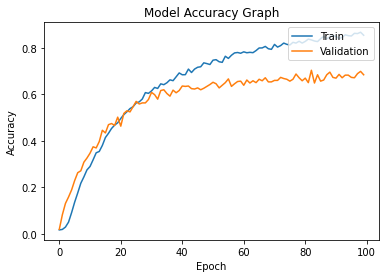

In [24]:
accuracy_history = history.history['accuracy']
validation_history = history.history['val_accuracy']

plt.plot(accuracy_history)
plt.plot(validation_history)
plt.title('Model Accuracy Graph')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()





#Save Model

In [25]:
model.save(f'{path}/letters_pred_model.h5')


#Load Model for Prediction

In [ ]:
# model = load_model('/content/letters_pred_model.h5')

#Test Model

2/2 [==============================] - 1s 293ms/step


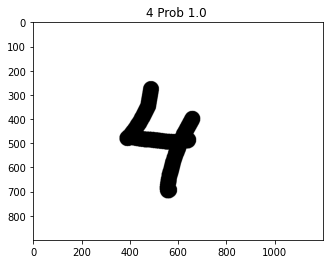

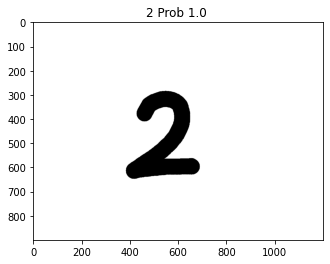

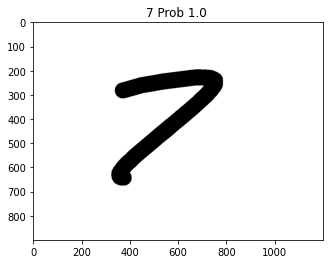

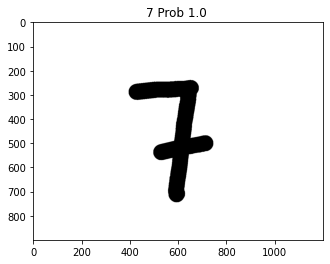

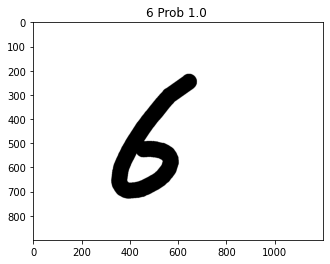

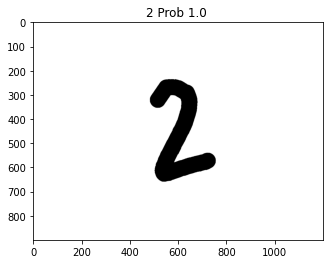

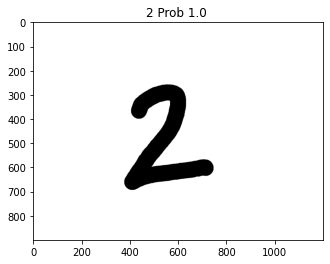

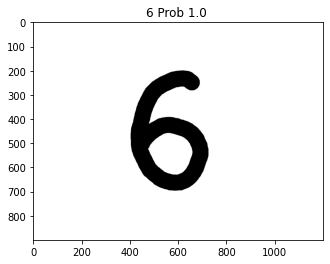

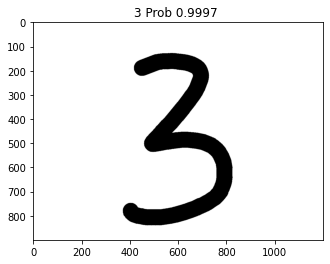

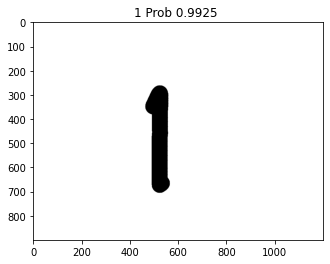

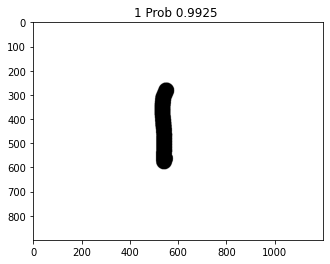

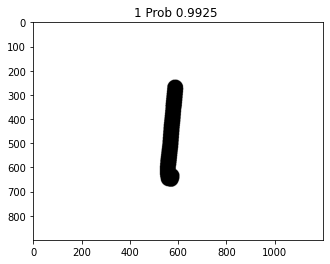

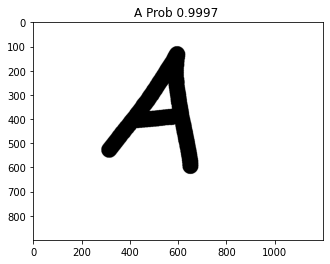

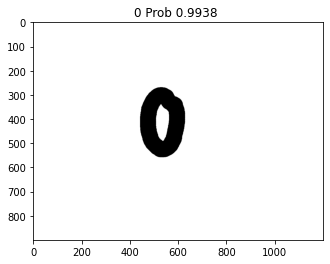

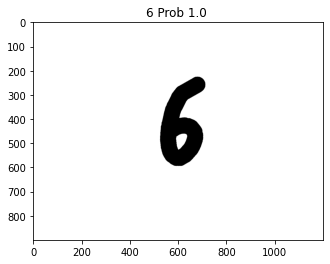

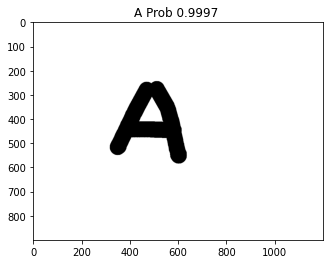

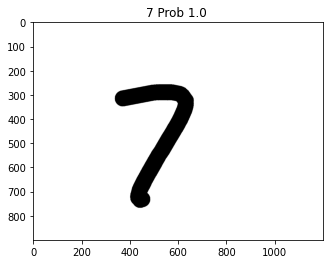

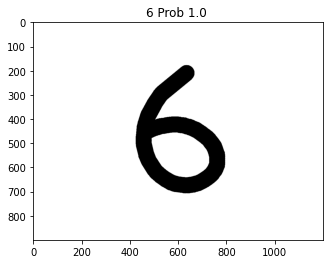

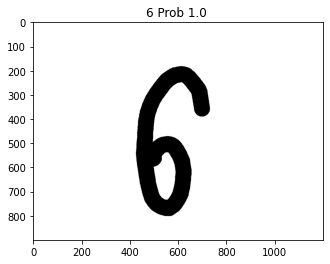

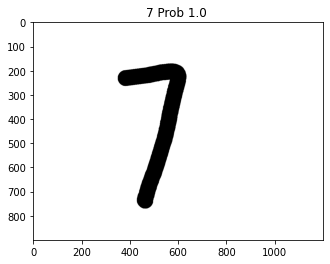

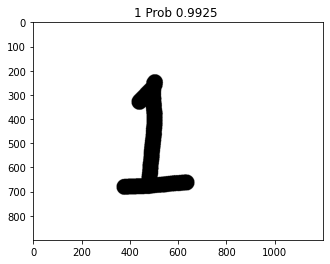

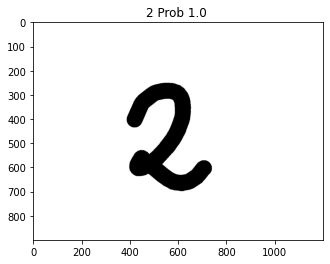

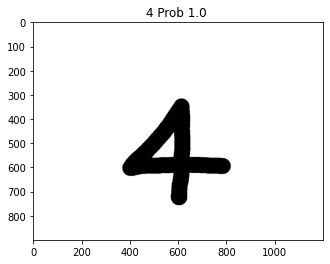

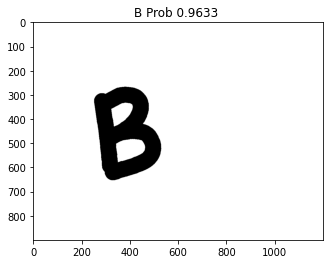

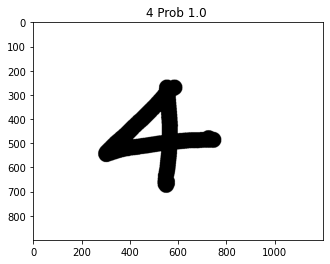

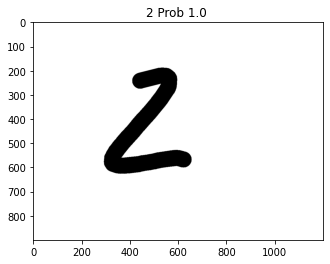

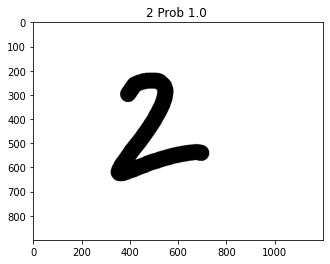

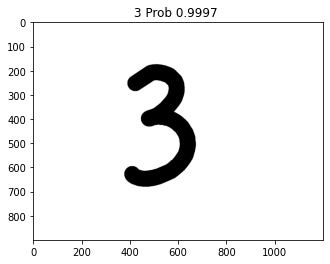

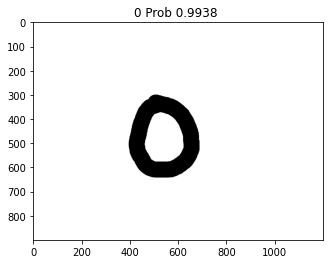

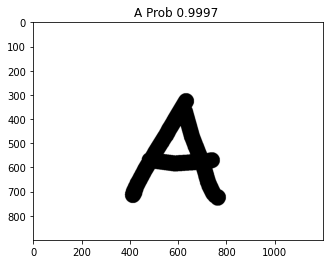

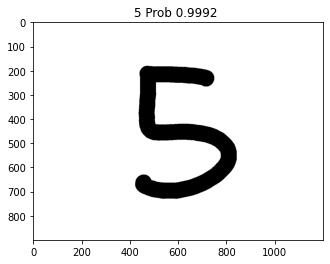

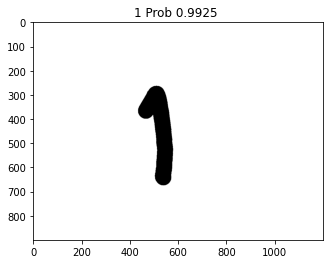

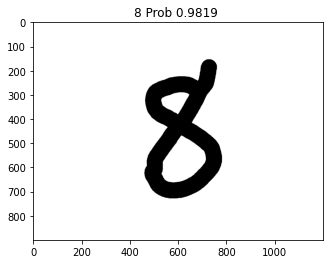

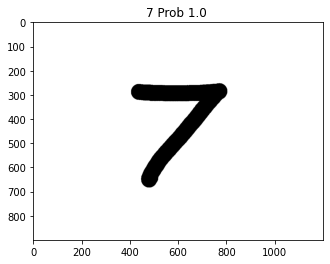

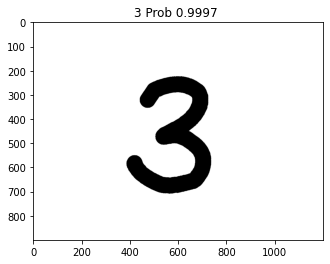

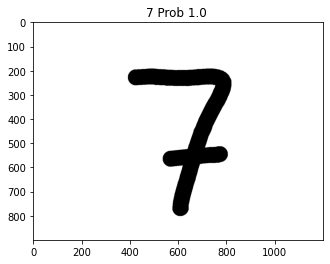

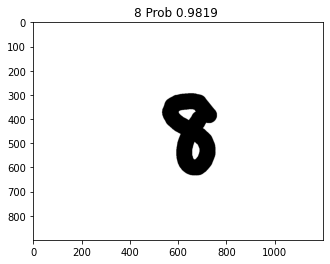

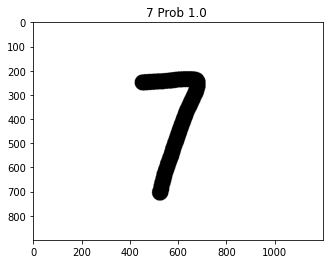

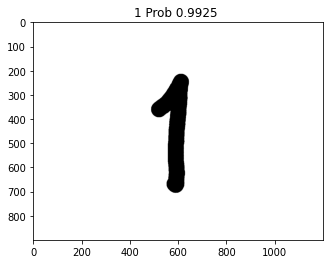

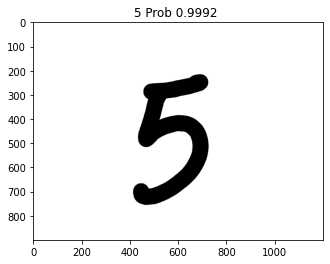

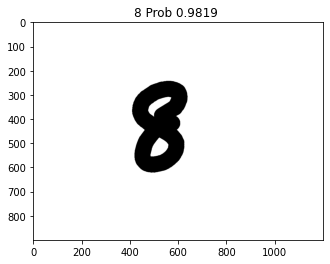

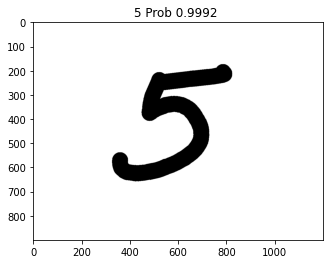

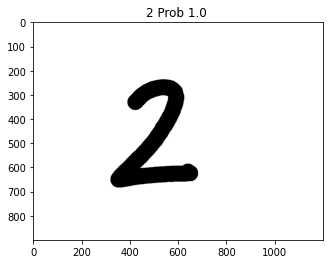

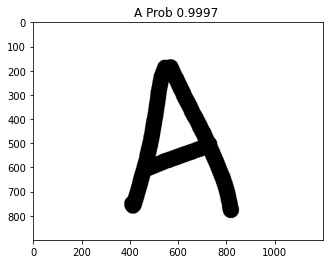

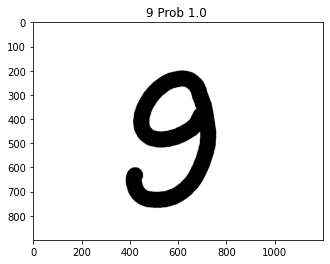

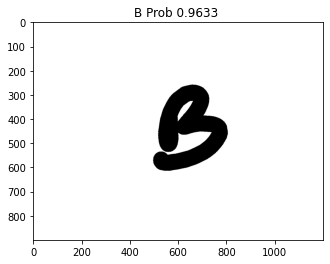

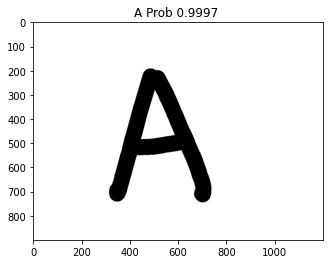

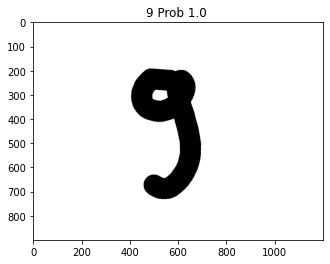

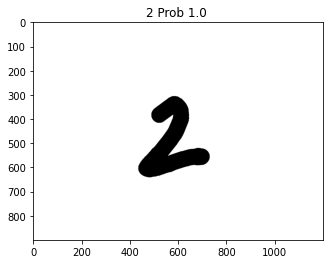

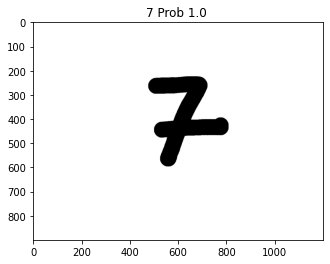

In [26]:
pred = model.predict(test_data_frame)

unique_chars = {
            0: "0", 1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7", 8: "8", 9: "9", 10: "A",
            11: "B", 12: "C", 13: "D", 14: "E", 15: "F", 16: "G", 17: "H", 18: "I", 19: "J", 20: "K",
            21: "L", 22: "M", 23: "N", 24: "O", 25: "P", 26: "Q", 27: "R", 28: "S", 29: "T", 30: "U",
            31: "V", 32: "W", 33: "X", 34: "Y", 35: "Z", 36: "a", 37: "b", 38: "c", 39: "d", 40: "e",
            41: "f", 42: "g", 43: "h", 44: "i", 45: "j", 46: "k", 47: "l", 48: "m", 49: "n", 50: "o",
            51: "p", 52: "q", 53: "r", 54: "s", 55: "t", 56: "u", 57: "v", 58: "w", 59: "x", 60: "y",
            61: "z"}

pred_results = pd.DataFrame(pred)
# max probability from the prediction results dataframe
maxIndex = list(pred_results.idxmax(axis=1))

#Check for only 50 characters
for i in range(len(test_set)):

    #get image using the path in csv
    image = cv.imread(path + '/' + test_set.at[i, 'image'])
    #show the predicted character and the probability
    plt.title(f'{unique_chars.get(maxIndex[i], "error")} Prob {round(max(pred_results[maxIndex[i]]), 4)} ')
  
    plt.imshow(image)
    plt.show()